In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
data = pd.read_csv('./../use-of-force.csv')
data.loc[data.Sector == '-', 'Sector'] = np.nan
data

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,NaN,NaN,NaN,2238,14470,Black or African American,Female
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,NaN,NaN,NaN,1589,12833,Black or African American,Male
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,NaN,NaN,NaN,2017,12130,White,Male
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,NaN,NaN,NaN,4759,15571,Black or African American,Male
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,NaN,NaN,NaN,4745,16299,White,Female
...,...,...,...,...,...,...,...,...,...,...,...
8056,31379-1261-17409,31379,Level 1 - Use of Force,2018-08-02T10:55:00,NaN,NaN,NaN,1261,17409,Black or African American,Male
8057,31434-1067-17417,31434,Level 1 - Use of Force,2018-08-02T18:35:00,NaN,NaN,NaN,1067,17417,NaN,Male
8058,31581-2323-17456,31581,Level 1 - Use of Force,2018-08-06T19:10:00,NaN,NaN,NaN,2323,17456,Black or African American,Male
8059,31784-2455-16869,31784,Level 1 - Use of Force,2018-08-09T15:00:00,NaN,NaN,NaN,2455,16869,White,Male


<AxesSubplot:>

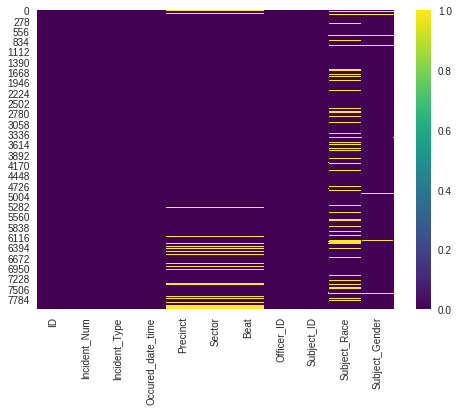

In [3]:
sns.heatmap(data.isnull(), cmap='viridis')

In [4]:

encoder = LabelEncoder()
data_sub = data.copy()

data_sub['Precinct'] = data_sub['Precinct'].fillna('_')
data_sub['Sector'] = data_sub['Sector'].fillna('_')
data_sub['Beat'] = data_sub['Beat'].fillna('_')
data_sub['Subject_Race'] = data_sub['Subject_Race'].fillna('_')
data_sub['Subject_Gender'] = data_sub['Subject_Gender'].fillna('_')


data_sub['Precinct'] = encoder.fit_transform(data_sub['Precinct'])
data_sub['Sector'] = encoder.fit_transform(data_sub['Sector'])
data_sub['Beat'] = encoder.fit_transform(data_sub['Beat'])
data_sub['Subject_Race'] = encoder.fit_transform(data_sub['Subject_Race'])
data_sub['Subject_Gender'] = encoder.fit_transform(data_sub['Subject_Gender'])
data_sub

,ID,Incident_Num,Incident_Type,Occured_date_time,Precinct,Sector,Beat,Officer_ID,Subject_ID,Subject_Race,Subject_Gender
0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,6,19,53,2238,14470,2,0
1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,6,19,53,1589,12833,2,1
2,15041-2017-12130,15041,Level 1 - Use of Force,2017-03-30T15:59:00,6,19,53,2017,12130,5,1
3,29139-4759-15571,29139,Level 1 - Use of Force,2018-02-15T13:06:00,6,19,53,4759,15571,2,1
4,30425-4745-16299,30425,Level 1 - Use of Force,2018-07-17T21:00:00,6,19,53,4745,16299,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8056,31379-1261-17409,31379,Level 1 - Use of Force,2018-08-02T10:55:00,6,19,53,1261,17409,2,1
8057,31434-1067-17417,31434,Level 1 - Use of Force,2018-08-02T18:35:00,6,19,53,1067,17417,6,1
8058,31581-2323-17456,31581,Level 1 - Use of Force,2018-08-06T19:10:00,6,19,53,2323,17456,2,1
8059,31784-2455-16869,31784,Level 1 - Use of Force,2018-08-09T15:00:00,6,19,53,2455,16869,5,1


In [5]:
trans = OrdinalEncoder()

y_data_sub = encoder.fit_transform(data_sub['Incident_Type'])
x_data_sub = data_sub.drop(columns='Incident_Type', axis=1)

x_data_sub = trans.fit_transform(x_data_sub)
x_data_sub.shape

(8061, 10)

In [6]:
data_del = data.copy()
data_del = data_del.dropna()
data_del.shape


(6242, 11)

In [7]:
y_data_del = encoder.fit_transform(data_del['Incident_Type'])
x_data_del = data_del.drop(columns='Incident_Type', axis=1)

x_data_del = trans.fit_transform(x_data_del)
x_data_del.shape

(6242, 10)

In [43]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Accuracy")


    # Plot learning curve
    axes[0].grid(True)
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                             train_scores_mean + train_scores_std, alpha=0.1,
                             color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1,
                             color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                     label="Training Accuracy")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                     label="Cross-validation Accuracy")
    axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
    axes[1].grid(True)
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                             fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("Times (Milliseconds)")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid(True)
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                             test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("Times (Milliseconds)")
    axes[2].set_ylabel("Accuracy")
    axes[2].set_title("Performance of the model")

    plt.show()
    return [np.mean(test_scores_mean), sum(fit_times_mean)]

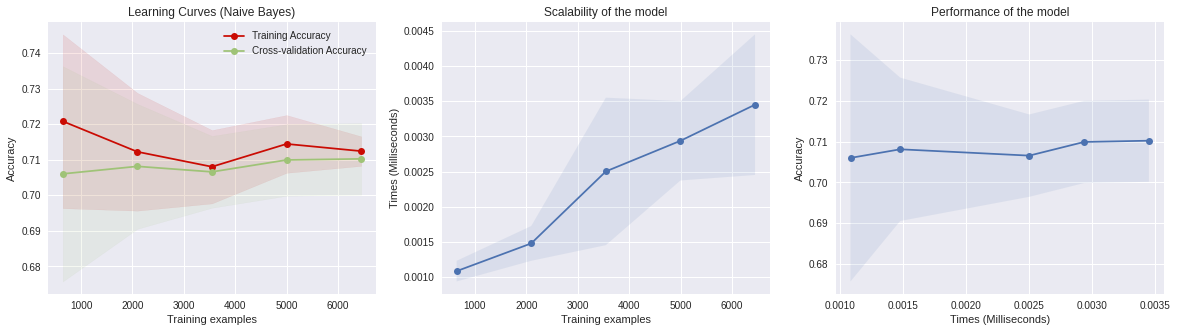

In [49]:
plt.style.use('seaborn')

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
reults_nav_sub = plot_learning_curve(estimator, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [50]:
reults_nav_sub

[0.7081711097334159, 0.011455464363098144]

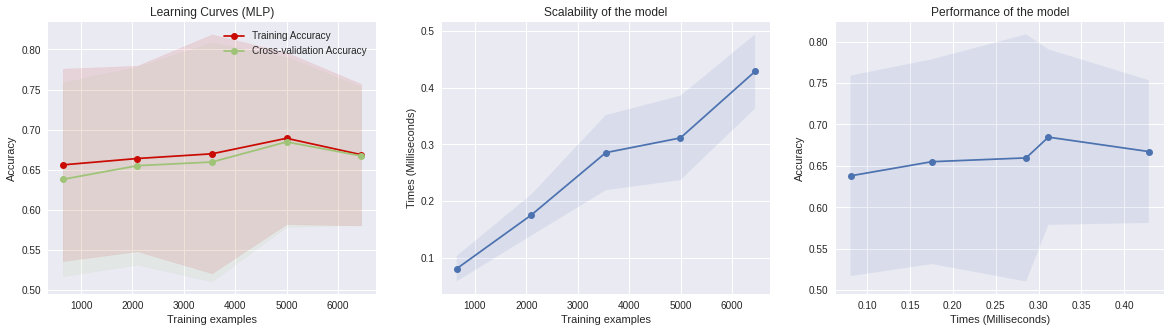

In [51]:
plt.style.use('seaborn')

title = "Learning Curves (MLP)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

mlp= MLPClassifier()
results_mlp_sub = plot_learning_curve(mlp, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [52]:
results_mlp_sub

[0.6609299442033478, 1.2814162731170655]

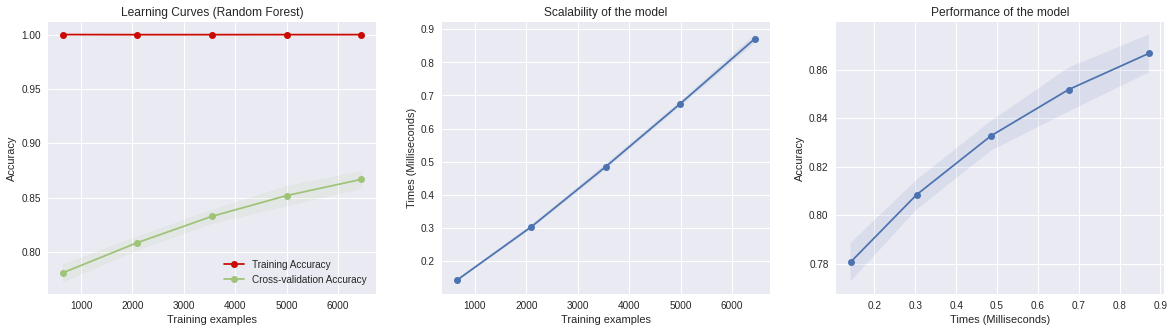

In [53]:
plt.style.use('seaborn')

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100)
results_clf_sub = plot_learning_curve(clf, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [54]:
results_clf_sub

[0.8280347179169251, 2.476576638221741]

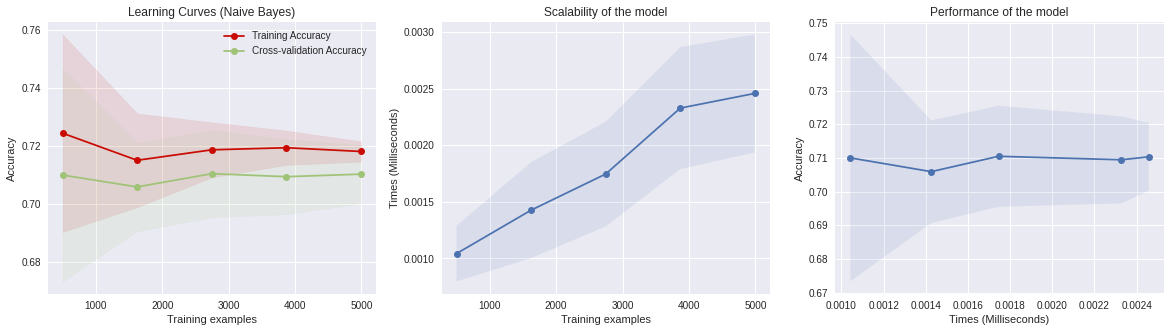

In [55]:
plt.style.use('seaborn')

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianNB()
reults_nav_del = plot_learning_curve(estimator, title, x_data_del, y_data_del,
                    cv=cv, n_jobs=4)

In [56]:
reults_nav_del

[0.7092393915132107, 0.00899960994720459]

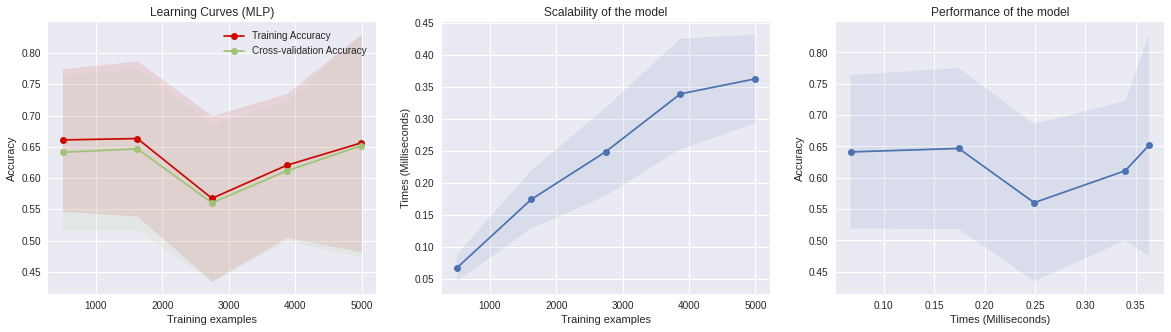

In [57]:
plt.style.use('seaborn')

title = "Learning Curves (MLP)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

mlp= MLPClassifier()
reults_mlp_del = plot_learning_curve(mlp, title, x_data_del, y_data_del,
                    cv=cv, n_jobs=4)

In [58]:
reults_mlp_del

[0.6221937550040033, 1.1927393436431886]

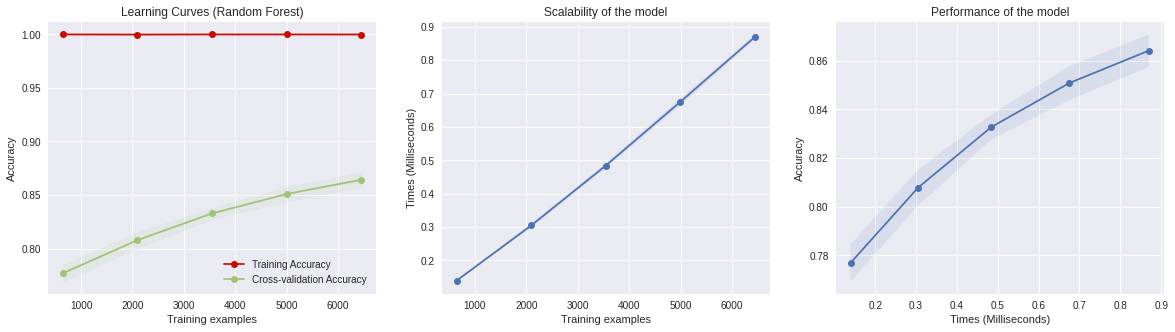

In [59]:
plt.style.use('seaborn')

title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

clf = RandomForestClassifier(n_estimators=100)
reults_clf_del = plot_learning_curve(clf, title, x_data_sub, y_data_sub,
                    cv=cv, n_jobs=4)

In [60]:
reults_clf_del

[0.8265220086794793, 2.47422571182251]

Text(0.5, 1.0, 'Acurácia com valores faltosos substituidos')

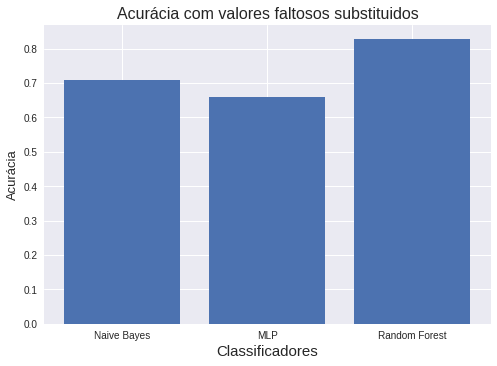

In [78]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_sub[0], results_mlp_sub[0], results_clf_sub[0]])
plt.ylabel('Acurácia',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Acurácia com valores faltosos substituidos', fontsize = 16)

Text(0.5, 1.0, 'Acurácia com valores faltosos deletados')

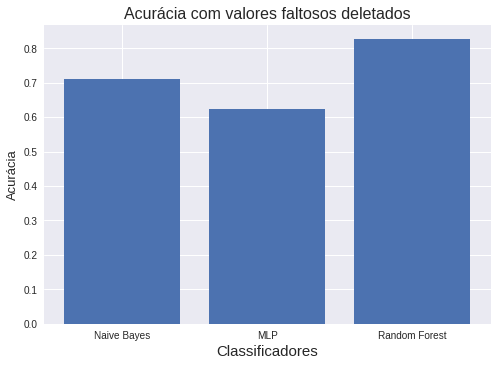

In [87]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_del[0], reults_mlp_del[0], reults_clf_del[0]])
plt.ylabel('Acurácia',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Acurácia com valores faltosos deletados', fontsize = 16)

Text(0.5, 1.0, 'Tempo em Milissegundos com valores faltosos Substituidos')

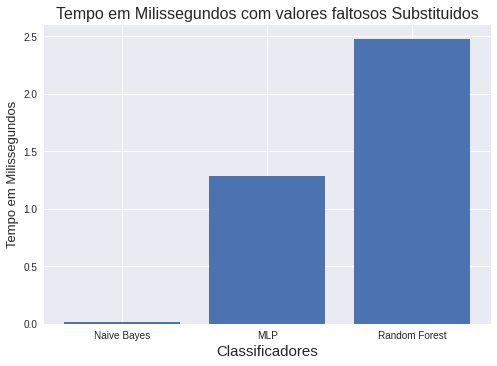

In [88]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_sub[1], results_mlp_sub[1], results_clf_sub[1]])
plt.ylabel('Tempo em Milissegundos',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Tempo em Milissegundos com valores faltosos Substituidos', fontsize = 16)

Text(0.5, 1.0, 'Tempo em Milissegundos com valores faltosos deletados')

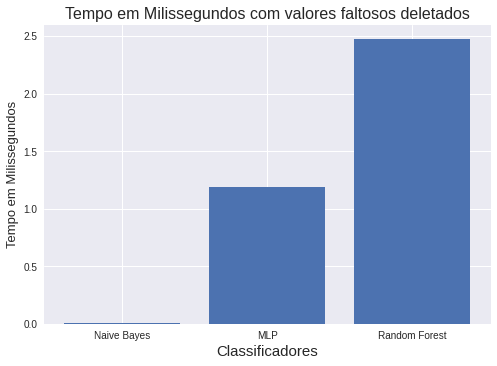

In [86]:
plt.style.use('seaborn')
plt.bar(['Naive Bayes', 'MLP', 'Random Forest'],[reults_nav_del[1], reults_mlp_del[1], reults_clf_del[1]])
plt.ylabel('Tempo em Milissegundos',  fontsize=13)
plt.xlabel('Classificadores',  fontsize=15)
plt.title('Tempo em Milissegundos com valores faltosos deletados', fontsize = 16)